In [3]:
# chap 10.2

import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist


In [5]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
x_train_full.shape

(60000, 28, 28)

In [15]:
x_train_full.dtype

dtype('uint8')

In [6]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] / 255.0, y_train_full[5000:]/255.0

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [21]:
hidden1 = model.layers[1]
model.get_layer('dense_3') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05288641,  0.04564773, -0.05500689, ..., -0.03837319,
        -0.02771121, -0.05648242],
       [-0.06731793,  0.06980059, -0.03507598, ..., -0.06238095,
         0.0221127 , -0.05978232],
       [-0.04237605,  0.06241995, -0.03752689, ..., -0.04339154,
         0.06810406, -0.01981144],
       ...,
       [ 0.03369623, -0.01752039,  0.06531101, ..., -0.03539745,
         0.04028153, -0.07115017],
       [-0.02725856,  0.03172068,  0.03472465, ...,  0.06310491,
         0.04694451,  0.07284789],
       [-0.00019336,  0.00770445, -0.05976477, ..., -0.02462708,
        -0.02800183,  0.04577493]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0127 - accuracy: 0.1008 - val_loss: 0.0011 - val_accuracy: 0.0914
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 7.5742e-04 - accuracy: 0.1008 - val_loss: 5.1868e-04 - val_accuracy: 0.0914
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 4.1700e-04 - accuracy: 0.1008 - val_loss: 3.3740e-04 - val_accuracy: 0.0914
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.8528e-04 - accuracy: 0.1008 - val_loss: 2.4891e-04 - val_accuracy: 0.0914
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1542e-04 - accuracy: 0.1008 - val_loss: 1.9671e-04 - val_accuracy: 0.0914
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.7245e-04 - accuracy: 0.1008 - val_loss: 1.6244e-04 - val_accuracy: 0.0914
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4344e-04 - accurac

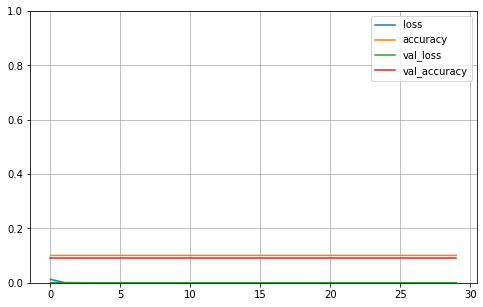

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y축 0, 1로 설정
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

housing = fetch_california_housing()


In [ ]:
xtrain_full, xtest, ytrain_full, ytest = train_test_split(housing.data, housing.target)

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain_full, ytrain_full)

In [ ]:
scaler= StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xvalid = scaler.transform(xvalid)
xtest = scaler.transform(xtest)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = xtrain.shape[1:]),
    keras.layers.Dense(1)]
)
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(xtrain, ytrain, epochs = 20, validation_data = (xvalid, yvalid))
mse_test = model.evaluate(xtest, ytest)
xnew = xtest[:3]
ypred = model.predict(xnew)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8594 - val_loss: 0.5034
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5586 - val_loss: 0.4575
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5084 - val_loss: 0.4395
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4859 - val_loss: 0.4378
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4663 - val_loss: 0.4232
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5330 - val_loss: 0.4932
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4951 - val_loss: 0.4131
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4385 - val_loss: 0.4076
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4311 - val_loss: 0.4012
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4235 - val_loss: 0.3991

In [ ]:
# 와이드 경로 + 딥경로
input_ = keras.layers.Input(shape = xtrain.shape[1:])
# 30개의 뉴런과 ReLU 함수 Dense층
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_) 
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
#concatenate 층으로 입력과 hidden2 층 출력을 연결
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.Model(inputs = [input_], outputs = [output])

In [ ]:
#여러 입력을 가진 모델
input_A = keras.layers.Input(shape = [5], name='wide_input')
input_B = keras.layers.Input(shape = [6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = 'output')(concat)
model2 = keras.Model(inputs = [input_A, input_B], outputs = [output])
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [ ]:
model2.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate= 1e-3))

In [ ]:
xtrain_A, xtrain_B = xtrain[:, :5], xtrain[:, 2:]
xvalid_A, xvalid_B = xvalid[:, :5], xvalid[:, 2:]
xtest_A, xtest_B = xtest[:, :5], xtest[:, 2:]
xnew_A, xnew_B = xtest_A[:3], xtest_B[:3]

history = model2.fit((xtrain_A, xtrain_B), ytrain, epochs = 20, validation_data=((xvalid_A, xvalid_B), yvalid))
mse_test = model2.evaluate((xtest_A, xtest_B), ytest)
ypred = model2.predict((xnew_A, xnew_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.1106 - val_loss: 0.8973
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7778 - val_loss: 0.7107
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6764 - val_loss: 0.6482
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6294 - val_loss: 0.6123
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5973 - val_loss: 0.5859
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5732 - val_loss: 0.5655
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5536 - val_loss: 0.5482
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5378 - val_loss: 0.5366
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5247 - val_loss: 0.5243
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5138 - val_loss: 0.5113

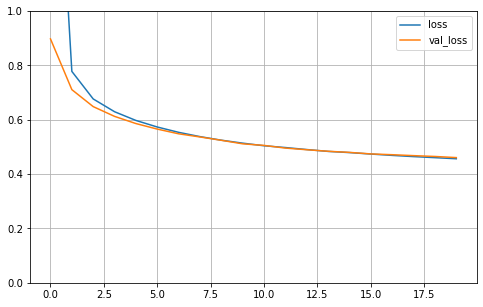

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y축 0, 1로 설정
plt.show()

In [ ]:
output = keras.layers.Dense(1, name = 'main_output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2)
model3 = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [ ]:
model3.compile(loss = ['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')
history = model3.fit(
    [xtrain_A, xtrain_B], [ytrain, ytrain], epochs = 20, validation_data = ([xvalid_A, xvalid_B], [yvalid, yvalid])
)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.7406 - main_output_loss: 0.6645 - aux_output_loss: 1.4256 - val_loss: 0.6768 - val_main_output_loss: 0.6455 - val_aux_output_loss: 0.9586
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5149 - main_output_loss: 0.4824 - aux_output_loss: 0.8081 - val_loss: 0.4750 - val_main_output_loss: 0.4399 - val_aux_output_loss: 0.7902
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4682 - main_output_loss: 0.4402 - aux_output_loss: 0.7196 - val_loss: 0.4463 - val_main_output_loss: 0.4169 - val_aux_output_loss: 0.7102
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4585 - main_output_loss: 0.4357 - aux_output_loss: 0.6637 - val_loss: 0.4717 - val_main_output_loss: 0.4423 - val_aux_output_loss: 0.7358
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4353 - main_output_loss: 0.4123 - aux_output_loss: 0.6418 - val_loss

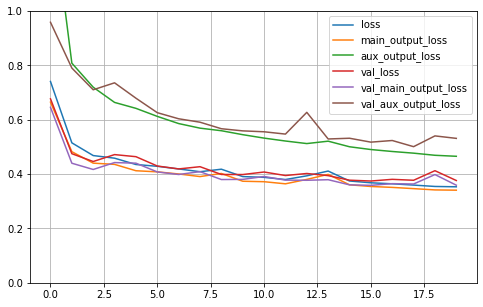

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y축 0, 1로 설정
plt.show()

In [ ]:
ytrain.shape

(11610,)

In [ ]:
total_loss, main_loss, aux_loss = model3.evaluate([xtest_A, xtest_B], [ytest, ytest])

162/162 [==============================] - 0s 3ms/step - loss: 0.3712 - main_output_loss: 0.3587 - aux_output_loss: 0.4841


In [ ]:
y_pred_main, y_pred_aux = model3.predict([xnew_A, xnew_B])

1/1 [==============================] - 0s 165ms/step


In [ ]:
xtrain[0,:5]

array([-0.05033035,  0.59923963,  0.09501245, -0.13006021, -0.26243229])

In [ ]:
y_pred_main, y_pred_aux

(array([[1.1373997],
        [2.395566 ],
        [1.3078055]], dtype=float32),
 array([[1.4813389],
        [2.0791514],
        [1.5089259]], dtype=float32))

In [ ]:
# 시퀀셜, 함수형 api는 선언적
#동적인 구조의 모델이 필요한 경우 서브클래싱 api 사용